## Admin

In [1]:
import os
from os.path import dirname, join
import pydicom
from pydicom.filereader import read_dicomdir
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import glob
import nibabel as nib


def show_slices(slices,cmapStr):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap=cmapStr, origin="lower")

C:\Users\tr17\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load Philips 4D Flow DICOM (from GTFlow)

In [2]:
studyDir=r'E:\Users\tr17\Documents\Projects\PC_Fetal_CMR\Data\dicom_fcmr_4d'
extPath=r'\GTflow_Aorta\10000000\10000001'

dcmdirFile=r'\GTflow_Aorta\DICOMDIR'

dcmOutputFold=r'\dcm'
dcmOutputDir=studyDir+dcmOutputFold

dcmNum = 4

if dcmNum == 1:
    dcmDir=r'\100008C6'
elif dcmNum == 2:
    dcmDir=r'\10000002'
elif dcmNum == 3:
    dcmDir=r'\10000233'
elif dcmNum == 4:
    dcmDir=r'\10000464'
elif dcmNum == 5:
    dcmDir=r'\10000695'

fullPath = studyDir+extPath+dcmDir
os.chdir(fullPath)
#!dir

## Load FCMR 4D Flow Nifti Files

In [3]:
fcmrDir=r'E:\Users\tr17\Documents\Projects\PC_Fetal_CMR\Data\4D_Flow_Paper\fcmr202'

cineVolDir=r'\cine_vol'
cineVolniiFileName=r'\cine_vol.nii.gz'
cineVol_nii = nib.load(fcmrDir+cineVolDir+cineVolniiFileName)

velVolDir=r'\vel_vol'
velVol0niiFileName=r'\velocity-final-polyCorr-0.nii.gz'
velVol1niiFileName=r'\velocity-final-polyCorr-1.nii.gz'
velVol2niiFileName=r'\velocity-final-polyCorr-2.nii.gz'

velVol0_nii = nib.load(fcmrDir+velVolDir+velVol0niiFileName)
velVol1_nii = nib.load(fcmrDir+velVolDir+velVol1niiFileName)
velVol2_nii = nib.load(fcmrDir+velVolDir+velVol2niiFileName)

cineVol_img = cineVol_nii.get_fdata()
velVol0_img = velVol0_nii.get_fdata()
velVol1_img = velVol1_nii.get_fdata()
velVol2_img = velVol2_nii.get_fdata()

print(cineVol_img.shape)
print(velVol0_img.shape)
print(velVol1_img.shape)
print(velVol2_img.shape)

(43, 44, 52, 25)
(43, 44, 52, 25)
(43, 44, 52, 25)
(43, 44, 52, 25)


### View Nifti Data

Text(0.5, 0.98, 'vel2 slices')

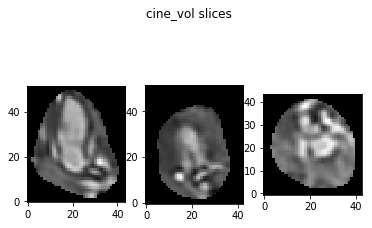

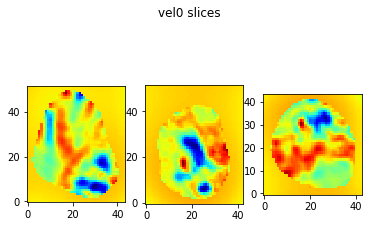

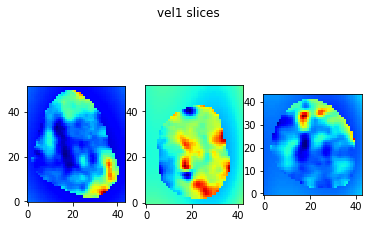

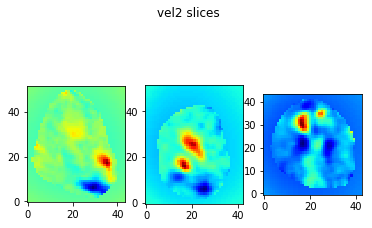

In [4]:
cvx = cineVol_img[26, :, :, 1]
cvy = cineVol_img[:, 30, :, 1]
cvz = cineVol_img[:, :, 16, 1]
show_slices([cvx, cvy, cvz], "gray")
plt.suptitle("cine_vol slices")

v0x = velVol0_img[26, :, :, 1]
v0y = velVol0_img[:, 30, :, 1]
v0z = velVol0_img[:, :, 16, 1]
show_slices([v0x, v0y, v0z], "jet")
plt.suptitle("vel0 slices")

v1x = velVol1_img[26, :, :, 1]
v1y = velVol1_img[:, 30, :, 1]
v1z = velVol1_img[:, :, 16, 1]
show_slices([v1x, v1y, v1z], "jet")
plt.suptitle("vel1 slices")

v2x = velVol2_img[26, :, :, 1]
v2y = velVol2_img[:, 30, :, 1]
v2z = velVol2_img[:, :, 16, 1]
show_slices([v2x, v2y, v2z], "jet")
plt.suptitle("vel2 slices")

### NIFTI Affine

In [5]:
np.set_printoptions(precision=3, suppress=True)
cineVol_nii.affine
#velVol0_nii.affine
#velVol1_nii.affine
#velVol2_nii.affine

array([[ -0.426,   0.65 ,   0.979, -36.182],
       [ -1.171,  -0.148,  -0.411,  89.745],
       [ -0.098,  -1.058,   0.659,  32.813],
       [  0.   ,   0.   ,   0.   ,   1.   ]])

## Examine DICOMs

In [5]:
dcmFiles = glob.glob("1000*")

ds = []
for d in dcmFiles:
    ds.append(pydicom.dcmread(d))
    
print( "Number of DICOMs loaded: {} ".format(len(ds)) )


# Print some basic DICOM details using first slice loaded
print()
print("____________ DICOM overview ____________")
print("Storage type.....................:", ds[0].SOPClassUID)

if hasattr(ds[0],'SeriesDescription'):
    print("SeriesDescription................:", ds[0].SeriesDescription)

if not hasattr(ds[0],'PatientName'):
    ds[0].PatientName='ZZZGMRI4^ROOM^^'
    print("Patient Name.....................:", ds[0].PatientName)
else:
    print("Patient Name.....................:", ds[0].PatientName)

if not hasattr(ds,'PatientID'):
    ds[0].PatientID='6793328'
    print("PatientID........................:", ds[0].PatientID)
else:
    print("PatientID........................:", ds[0].PatientID)
    
print("Modality.........................:", ds[0].Modality)
print("Study Date.......................:", ds[0].StudyDate)
print('Single slice pixel array.........: {} x {} voxels'.format(ds[0].Rows,
                                                                 ds[0].Columns))
tempArray = ds[0].pixel_array
dcmDataType = tempArray.dtype
print("Data type........................:", dcmDataType)

Number of DICOMs loaded: 560 

____________ DICOM overview ____________
Storage type.....................: 1.2.840.10008.5.1.4.1.1.4
Patient Name.....................: -*-
PatientID........................: 6793328
Modality.........................: MR
Study Date.......................: 20120821
Single slice pixel array.........: 192 x 192 voxels
Data type........................: uint16


In [6]:
ds[0].InstanceNumber

"1"

### Print DICOM header to file

In [7]:
with open(studyDir+'\dcm'+str(dcmNum)+'.txt', 'w') as f:
    print(ds[-1], file=f)

## Get DICOM info // view images

In [8]:
# Skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for d in ds:
    if hasattr(d, 'SliceLocation'):
        slices.append(d)
    else:
        skipcount = skipcount + 1

print("Number of slices skipped (i.e.: no SliceLocation): {}".format(skipcount))

# Ensure slices are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# Get pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

print()
print("Pixel Spacing: {}".format(ps))
print("Slice Thickness: {}".format(ss))
print("Voxel Aspect: {} x {} x {}".format(ax_aspect, sag_aspect, cor_aspect))

Number of slices skipped (i.e.: no SliceLocation): 0

Pixel Spacing: [1.97916662693023, 1.97916662693023]
Slice Thickness: 2.6
Voxel Aspect: 1.0 x 0.7612179334347038 x 1.313684236901624


In [9]:
# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)
print("FOV in Voxels: {} ".format(img3d.shape))

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

FOV in Voxels: (192, 192, 560) 


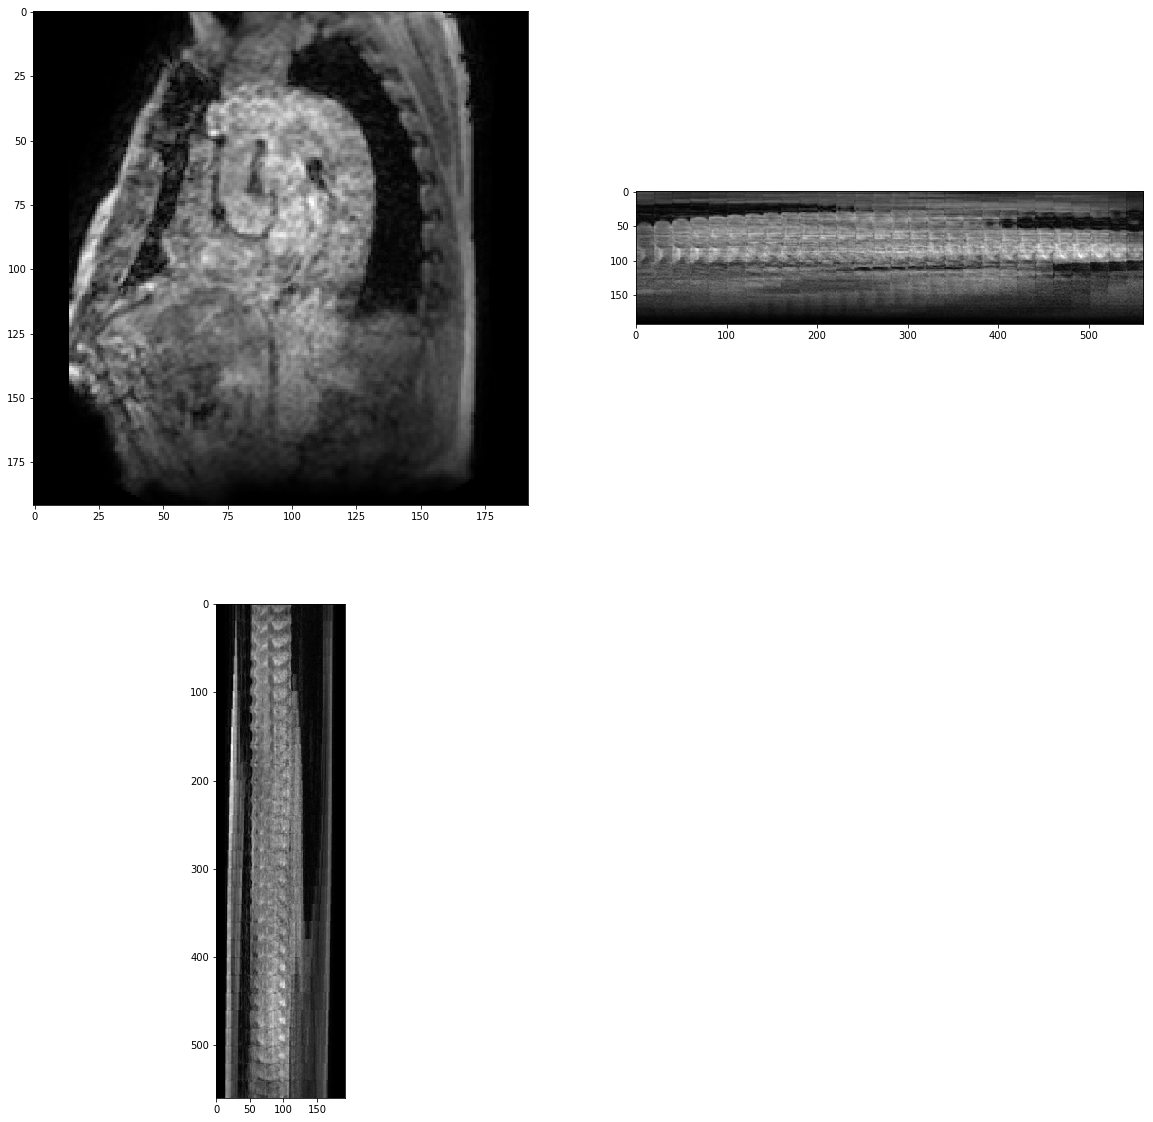

In [10]:
# plot 3 orthogonal slices
f = plt.figure(figsize=(20,20))

a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2], cmap=plt.cm.gray)
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :], cmap=plt.cm.gray)
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T, cmap=plt.cm.gray)
a3.set_aspect(cor_aspect)

plt.show()

### Reshape Nifti to 3D array
- DICOMs need to be 3D, where 3rd dimension is nFrames * nZ
- Dimension 3 order:
    - Inner loop = nFrames
    - Outer loop = nZ

In [11]:
nX = cineVol_img.shape[0]
nY = cineVol_img.shape[1]
nZ = cineVol_img.shape[2]
nF = cineVol_img.shape[3]

c  = np.reshape(cineVol_img, [nX, nY, nZ*nF])
v0 = np.reshape(velVol0_img, [nX, nY, nZ*nF])
v1 = np.reshape(velVol1_img, [nX, nY, nZ*nF])
v2 = np.reshape(velVol2_img, [nX, nY, nZ*nF])

print("Original DICOM datatype:", dcmDataType)
print("Original Nifti datatype:", c.dtype)

c = c.astype(dcmDataType)
v0 = v0.astype(dcmDataType)
v1 = v1.astype(dcmDataType)
v2 = v2.astype(dcmDataType)

print("Converted Nifti datatype:", c.dtype)

Original DICOM datatype: uint16
Original Nifti datatype: float64
Converted Nifti datatype: uint16


### View FCMR Nifti Data

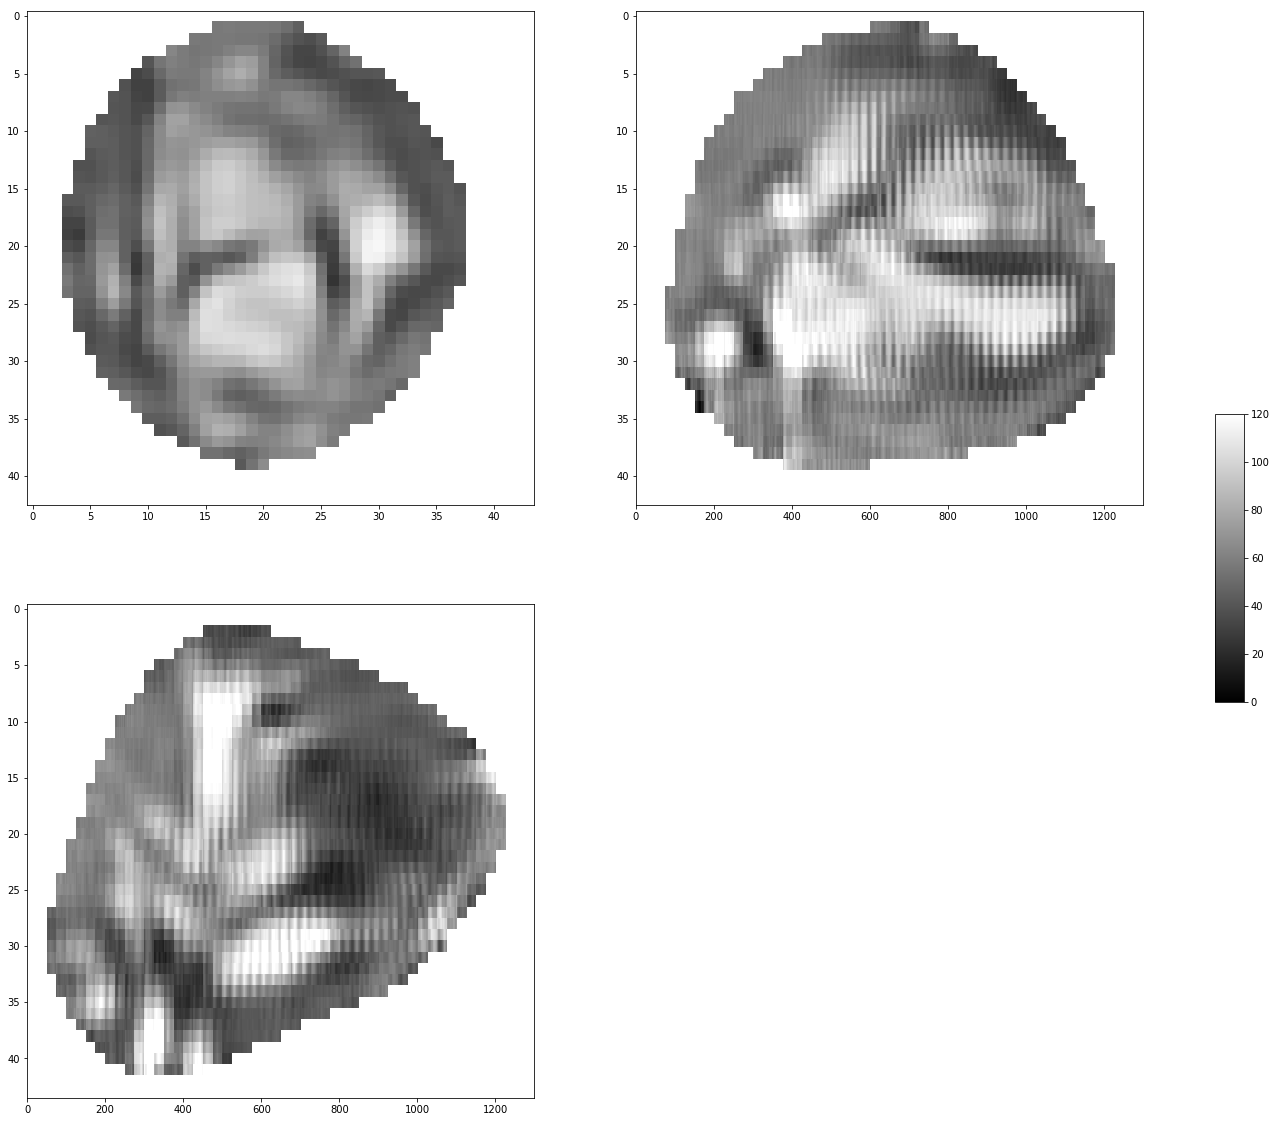

In [12]:
f = plt.figure(figsize=(20,20))

a1 = plt.subplot(2, 2, 1)
plt.imshow(c[:, :, c.shape[2]//2], cmap=plt.cm.gray)
plt.clim(0,120)
a1.set_aspect('auto')

a2 = plt.subplot(2, 2, 2)
plt.imshow(c[:, c.shape[1]//2, :], cmap=plt.cm.gray)
plt.clim(0,120)
a2.set_aspect('auto')

a3 = plt.subplot(2, 2, 3)
plt.imshow(c[c.shape[0]//2, :, :], cmap=plt.cm.gray)
plt.clim(0,120)
a3.set_aspect('auto')

cax = plt.axes([0.95, 0.4, 0.02, 0.2])
plt.colorbar(cax=cax)
plt.show()

In [13]:
# dsNew = []
# dsNew = ds[0]

# print(dsNew.pixel_array.shape)
# dsNew.pixel_array

# print("Dicom Position")
# print(dsNew.ImagePositionPatient)

# print("Dicom Orientation")
# print(dsNew.ImageOrientationPatient)

# print("Dicom Pixel Spacing")
# print(dsNew.PixelSpacing)

# print("Dicom Slice Spacing")
# print(dsNew.SpacingBetweenSlices)


# a0 = cineVol_nii.affine[0,3]
# a1 = cineVol_nii.affine[1,3]
# a2 = cineVol_nii.affine[2,3]

# print("Nifti Position")
# niiP = [str(a0),str(a1),str(a2)]
# print(niiP)

# # This looks tricky: https://nipy.org/nibabel/dicom/dicom_orientation.html
# print("Nifti Orientation")
# niiO = ['0','0','0','0','0','0']
# print(niiO)

# # get from nifti hdr:
# print("Nifti Pixel Spacing")
# niiPS = ['1.25','1.25']
# print(niiPS)

# # get from nifti hdr:
# print("Nifti Slice Spacing")
# niiSS = 1.25
# print(niiSS)

In [14]:
# c = c.astype('int16')

# n=c.shape[2]//2
# print("n =", n)

# print(c.shape)
# arr = c[:,:,1000]
# print(arr.shape)
# print(arr.dtype)
# arr[arr==-1]=0



# print(dsNew.pixel_array.shape)
# # dsNew.PixelData = c[:,:,n]
# dsNew.PixelData = arr.tobytes()
# dsNew.Rows = arr.shape[0]
# dsNew.Columns = arr.shape[1]
# dsNew.ImagePositionPatient = niiP
# dsNew.ImageOrientationPatient = niiO
# dsNew.PixelSpacing = niiPS
# dsNew.SpacingBetweenSlices = niiSS
# print(dsNew)


# dsNew.save_as(r"E:\Users\tr17\Documents\Projects\PC_Fetal_CMR\Data\dicom_fcmr_4d\dcm\temp1000.dcm")

In [15]:
# c = c.astype('int16')

# # for n in range(0, nZ*nF):
# for n in [100, 200, 300, 400, 500, 600, 700, 800]:
    
#     # Initialise ds on each loop
#     dsNew = []
#     dsNew = ds[0]
    
#     # Set background voxels = 0
#     arr = c[:,:,n]
#     print(arr.shape)
#     arr[arr==-1] = 0
    
#     # Update PixelData
#     dsNew.PixelData = arr.tobytes()
    
#     # Update Dicom Header
#     dsNew.Rows = arr.shape[0]
#     dsNew.Columns = arr.shape[1]
#     dsNew.ImagePositionPatient = niiP
#     dsNew.ImageOrientationPatient = niiO
#     dsNew.PixelSpacing = niiPS
#     dsNew.SpacingBetweenSlices = niiSS
    
#     # Save Dicom

#     filename = 'cine_vol'
#     file_extension = '.dcm'
#     dcmFilename = "{}_{}{}".format(filename, n, file_extension)

#     dsNew.save_as(dcmOutputDir+'\\'+dcmFilename)
#     del(dsNew)

# print('Created new {} DICOM images'.format(nZ*nF))
# print(r'DICOM files saved in: {}'.format(dcmOutputDir))
    

## Overwrite DICOM with FCMR 4D data

In [13]:
os.chdir(studyDir)
if not os.path.isdir(dcmOutputDir):
    os.mkdir(dcmOutputDir)
os.chdir(dcmOutputDir)
#print(os.getcwd())
os.listdir()

['codifyTest.py',
 'codifyTest_mag.py',
 'codifyTest_mag_5A3.py',
 'codifyTest_mag_5A4.py',
 'codifyTest_mag_61A.py',
 'testDir',
 '_testCodifyTom_mag2.dcm']

In [18]:
unique_uid = pydicom.uid.generate_uid() # UID for dataset
VERSION = 'v1.0.0'

#for n in range(c.shape[2]):
for n in [100, 200, 300, 400, 500]:
    
    # initialise
    dsNew = []
    dsNew = ds[n]
    
    fmNew = []
    fmNew = pydicom.Dataset()
    fmExisting = dsNew.file_meta

    ### update meta
    elements_to_define_meta = {
        'FileMetaInformationGroupLength': 210,
        'MediaStorageSOPClassUID': '1.2.840.10008.5.1.4.1.1.7',
        'ImplementationVersionName': 'dicomserver ' + VERSION,
        'MediaStorageSOPInstanceUID': unique_uid,
    }
    
    elements_to_transfer_meta = {
        'ImplementationClassUID': 'ImplementationClassUID',
        'FileMetaInformationVersion': 'FileMetaInformationVersion',
        'TransferSyntaxUID': 'TransferSyntaxUID',
    }
    
    for k, v in elements_to_define_meta.items():
        setattr(fmNew, k, v)
        
    for k, v in elements_to_transfer_meta.items():
        try:
            setattr(fmNew, k, getattr(fmExisting, v))
        except:
            print(f"Could not transfer tag for keyword {k}")
            
    dsNew.file_meta = fmNew
    
    
    ### update dataset header
    elements_to_define = {
        'Format': 'DICOM',
        'FormatVersion': 3,
        'BitDepth': 16, # assuming uint16 images     
        'SOPClassUID': '1.2.840.10008.5.1.4.1.1.7', # xxx.7 = Secondary Capture Image Storage / xxx.4 = MR Image Storage
        'ConversionType': 'WSD', # WSD = Workstation
        'TimeofSecondaryCapture': '',
        'SecondaryCaptureDeviceManufacturer': 'PIH Research 4D FCMR Reconstruction',
        'SecondaryCaptureDeviceManufacturerModelName': '1.0.0',
        'SecondaryCaptureDeviceSoftwareVersion': '1.0.0',
        'SeriesInstanceUID': unique_uid,
        'SOPInstanceUID': pydicom.uid.generate_uid(), # UID for individual series
        'SeriesNumber': dsNew.SeriesNumber + 20,
        'Rows': c[:,:,n].shape[0],
        'Columns': c[:,:,n].shape[1],
    }
    
    for k, v in elements_to_define.items():
        setattr(dsNew, k, v)
        
    #### update pixel data
    cToWrite = c[:,:,n]
    dsNew.PixelData = cToWrite.tobytes()
       
    #### save current slice as single-frame DICOM
    dsNew.save_as( "oldwayIM_%04d"%(n+1) )
    

# print('Created new {} DICOM images, each with FOV = {}.'.format(len(fakeData) , dsNew.PixelData.shape))
print(r'New DICOM files saved in: {}'.format(os.getcwd()))

New DICOM files saved in: E:\Users\tr17\Documents\Projects\PC_Fetal_CMR\Data\dicom_fcmr_4d\dcm


In [16]:
len(ds)

560